<a href="https://colab.research.google.com/github/boemer00/deep_learning/blob/main/TF2_0_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Getting Started

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [64]:
data = load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [65]:
print(data.keys())
print(data.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)


In [67]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [69]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [70]:
data.target.shape

(569,)

In [71]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Part 2: Building a Model

In [72]:
from sklearn.model_selection import train_test_split

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

N, D = X_train.shape

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models


def initialize_model():
  # architecture
  model = Sequential()
  model.add(layers.Dense(1, activation='sigmoid', input_shape=(D,)))

  # compile
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model


# train
model = initialize_model()

history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=100,
                    verbose=0)


In [77]:
# Evaluate the model - evaluate() returns loss and accuracy
print('Train score: ', model.evaluate(X_train_scaled, y_train))
print('Test score: ', model.evaluate(X_test_scaled, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9685
Train score:  [0.09094946086406708, 0.9685039520263672]
6/6 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9894
Test score:  [0.05845761299133301, 0.9893617033958435]


In [76]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,3))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0,1))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

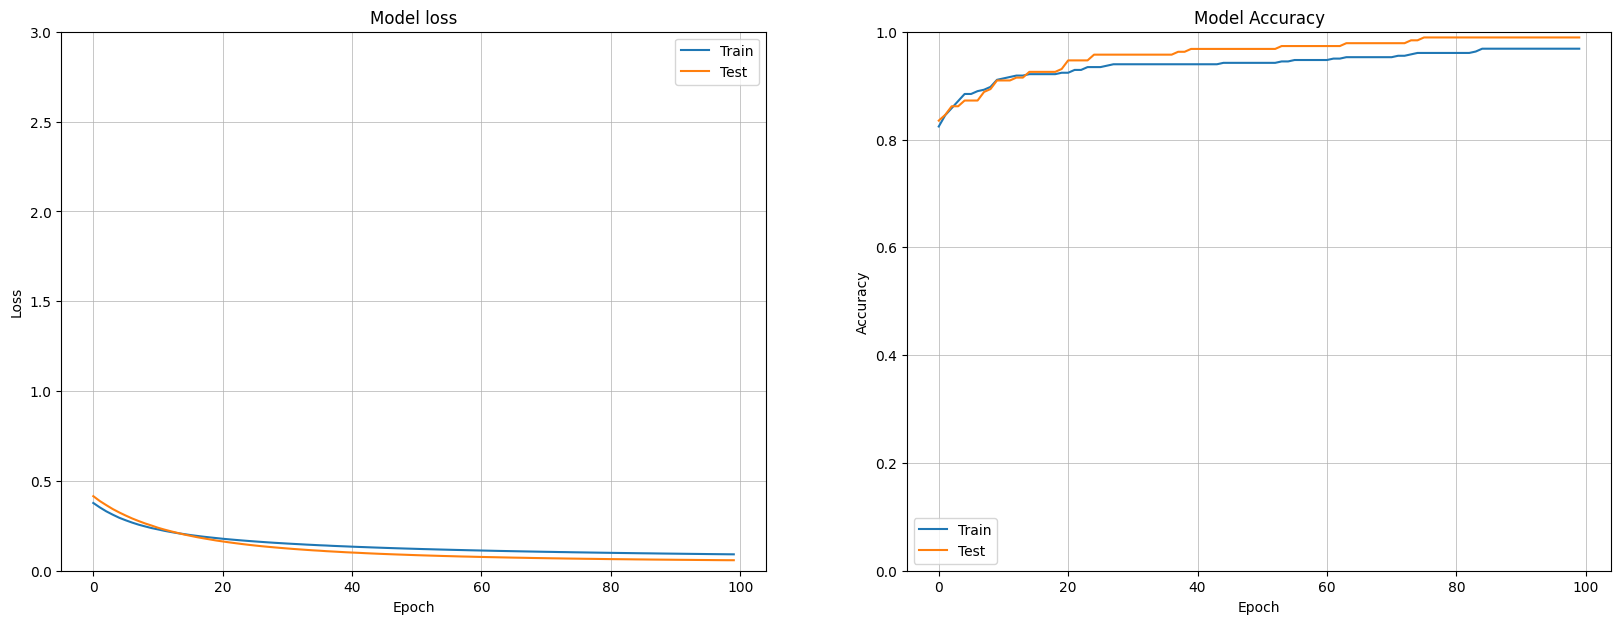

In [78]:
plot_loss_accuracy(history, title=None)

## Making Predictions

In [81]:
pred = model.predict(X_test_scaled)

# these are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)
print(pred[:10])

6/6 [==============================] - 0s 2ms/step
[[9.5272714e-01]
 [9.9575734e-01]
 [9.7298890e-01]
 [7.1865964e-01]
 [1.9221066e-18]
 [9.9817461e-01]
 [3.0386573e-01]
 [7.8305721e-01]
 [9.9369413e-01]
 [9.9103200e-01]]


In [82]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)

pred = np.round(pred).flatten()
print(pred)

[1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.]


In [83]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(pred == y_test))
print("Evaluate output:", model.evaluate(X_test_scaled, y_test))

Manually calculated accuracy: 0.9893617021276596
6/6 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9894
Evaluate output: [0.05845761299133301, 0.9893617033958435]


## Part 3 - Saving and Loading a Model

In [84]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [89]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K Jul 25 13:23 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Jul 20 13:28 sample_data


In [88]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417

model = models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test_scaled, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9894


[0.05845761299133301, 0.9893617033958435]

In [86]:
# Download the file - requires Chrome (at this point)
from google.colab import files

files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>